# Exploration of different ways of downscaling GEM to NEMO

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools

In [2]:
from scipy.interpolate import griddata

In [3]:
GEM_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [4]:
NEMO_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')

In [5]:
GEM = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1').isel(time = 0).u_wind.values

In [6]:
# GEM data coordinates
points = np.array([GEM_grid.latitude.values.ravel(), GEM_grid.longitude.values.ravel()-360]).T

In [7]:
# wind values
values = GEM.ravel()

In [8]:
# NEMO lat lon grids tuple
xi = (NEMO_grid.latitude.values, NEMO_grid.longitude.values)

In [97]:
# interpolate
grid_z0 = griddata(points, values, xi, method='nearest')
grid_z1 = griddata(points, values, xi, method='linear')
grid_z2 = griddata(points, values, xi, method='cubic')

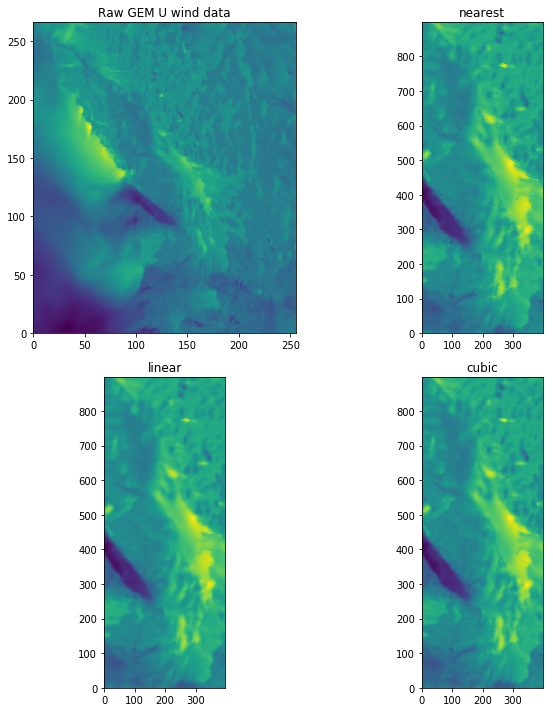

In [98]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
plt.pcolormesh(GEM)
plt.title('Raw GEM U wind data')
viz_tools.set_aspect(ax)
ax1 = plt.subplot(2,2,2)
plt.pcolormesh(grid_z0)
plt.title('nearest')
viz_tools.set_aspect(ax1)
ax2 = plt.subplot(2,2,3)
plt.pcolormesh(grid_z1)
plt.title('linear')
viz_tools.set_aspect(ax2)
ax3 = plt.subplot(2,2,4)
plt.pcolormesh(grid_z2)
plt.title('cubic')
viz_tools.set_aspect(ax3)
plt.tight_layout()

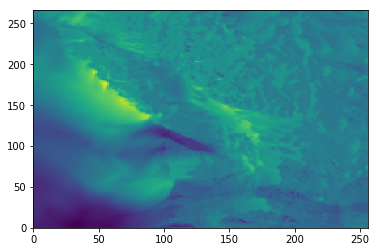

In [19]:
plt.pcolormesh(GEM)

In [28]:
import pickle
from salishsea_tools import utilities

In [49]:
file = open('/home/abhudia/Desktop/Wind speed/y2015_data.pickle', 'rb')

In [50]:
wind = pickle.load(file)

In [51]:
wind_jan = wind['jan_data'].values

In [34]:
points = np.array([GEM_grid.latitude.values.ravel(), GEM_grid.longitude.values.ravel()-360]).T
xi = (NEMO_grid.latitude.values, NEMO_grid.longitude.values)

It does not like broadcasting. Oof. Will loop it instead

In [52]:
bar = utilities.statusbar('Loading ...')
nearest = np.empty((1, 898, 398))
for grid in bar(range(wind_jan.shape[0])):
    grid_z0 = griddata(points, wind_jan[grid].ravel(), xi, method='nearest')
    nearest = np.vstack((nearest, np.expand_dims(grid_z0,0)))

Loading ... 100% (744 of 744) |#################################|Time:  0:06:19


In [53]:
bar = utilities.statusbar('Loading ...')
linear = np.empty((1, 898, 398))
for grid in bar(range(wind_jan.shape[0])):
    grid_z0 = griddata(points, wind_jan[grid].ravel(), xi, method='linear')
    linear = np.vstack((linear, np.expand_dims(grid_z0,0)))

Loading ... 100% (744 of 744) |#################################|Time:  0:12:42


In [54]:
bar = utilities.statusbar('Loading ...')
cubic = np.empty((1, 898, 398))
for grid in bar(range(wind_jan.shape[0])):
    grid_z0 = griddata(points, wind_jan[grid].ravel(), xi, method='cubic')
    cubic = np.vstack((cubic, np.expand_dims(grid_z0,0)))

Loading ... 100% (744 of 744) |#################################|Time:  0:16:19


# Compare

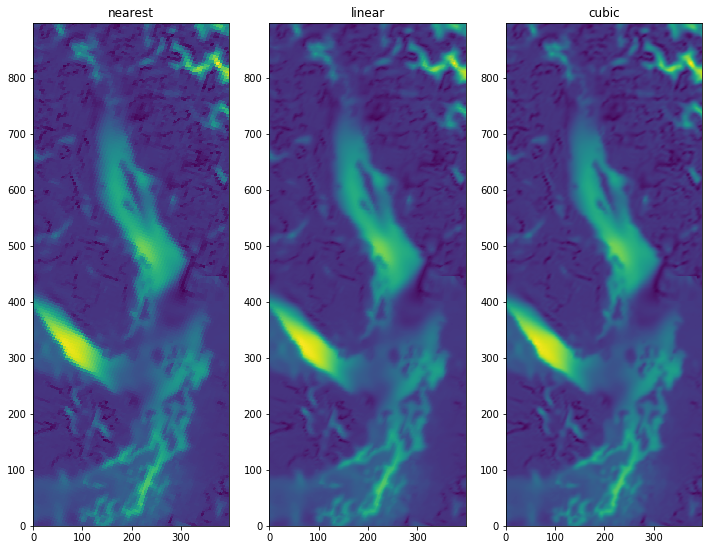

In [72]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(1,3,1)
plt.pcolormesh(nearest[1])
plt.title('nearest')
viz_tools.set_aspect(ax1)
ax2 = plt.subplot(1,3,2)
plt.pcolormesh(linear[1])
plt.title('linear')
viz_tools.set_aspect(ax2)
ax3 = plt.subplot(1,3,3)
plt.pcolormesh(cubic[1])
plt.title('cubic')
viz_tools.set_aspect(ax3)
plt.tight_layout()

# first frame is garbage

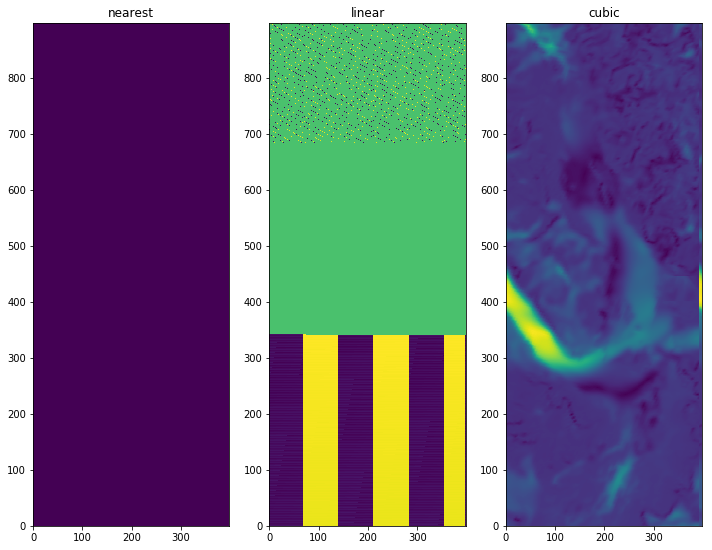

In [73]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(1,3,1)
plt.pcolormesh(nearest[0])
plt.title('nearest')
viz_tools.set_aspect(ax1)
ax2 = plt.subplot(1,3,2)
plt.pcolormesh(linear[0])
plt.title('linear')
viz_tools.set_aspect(ax2)
ax3 = plt.subplot(1,3,3)
plt.pcolormesh(cubic[0])
plt.title('cubic')
viz_tools.set_aspect(ax3)
plt.tight_layout()

In [58]:
nearest.shape

(745, 898, 398)

In [61]:
check = np.empty((1, 898, 398))
for grid in range(3):
    grid_z0 = griddata(points, wind_jan[grid].ravel(), xi, method='nearest')
    check = np.vstack((check, np.expand_dims(grid_z0,0)))

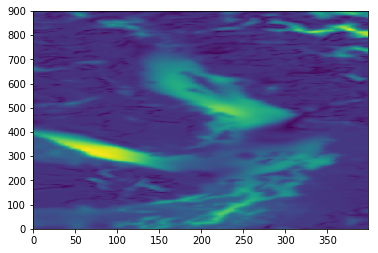

In [71]:
plt.pcolormesh(linear[1])